In [44]:
import sys
sys.path.append('../')
import Read_data_and_Write_results as rw
from evaluate import match_m
import data_helpers as dh

In [143]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

class linear_regression_model:

    def fit(self, x, y):
        x_r, y_r = [], []
        for i in range(x.shape[1]):
            x_r.append(x[:, i].sum() / np.sum(x))
            y_r.append((y[:, i].sum())/ x[:, i].sum()) 
        p4 = np.poly1d(np.polyfit(x_r, y_r, 1))
        return x_r, y_r, p4
    def predict(self, x):
        x_m = []
        for i in range(x.shape[1]):
            x_m.append(x[:, i].sum() / np.sum(x))
        return x_m

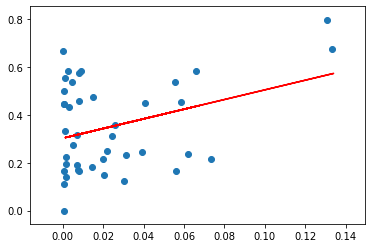

In [144]:
_, _, _, _, _, train_x, train_y, train_pos2Id, _ = dh.read("../datasets/s-train-train-split.txt")
_, _, _, _, _, test_x, _, test_pos2Id, _ = dh.read("../datasets/s-train-test-split.txt")
one_hot_train_x = dh.get_one_hot_matrix(train_x, len(train_pos2Id))
one_hot_train_y = dh.get_one_hot_matrix(train_y, len(train_pos2Id))
one_hot_test_x = dh.get_one_hot_matrix(test_x, len(test_pos2Id))
model = linear_regression_model()
x_r, y_r, p4 = model.fit(one_hot_train_x, one_hot_train_y)
x_m = model.predict(one_hot_test_x)
plt.scatter(x_r, y_r)
plt.plot(x_m, p4(x_m), c = 'r')


In [145]:
results = convert_matrix_to_2D_array("../datasets/s-train-test-split.txt", test_pos2Id, p4, x_m)
results["overal"] = (results[1] + results[2] + results[3] + results[4])/4
print(results)

{1: 0.4114285714285714, 2: 0.61, 3: 0.692528735632184, 4: 0.7282608695652174, 'overal': 0.6105545441564931}


In [109]:
def convert_matrix_to_2D_array(path, pos2Id, p4, x_m):
    _, _, _, _, truth, pos_lsts = rw.read_data(path)
    predictions = []
    for i in range(len(pos_lsts)):
        prediction = []
        for j in range(len(pos_lsts[i])):
            if pos_lsts[i][j] in pos2Id.keys():
                tem = pos2Id[pos_lsts[i][j]]
                prediction.append(p4(x_m[tem]))
        predictions.append(prediction)
    return match_m(predictions, truth)